In [98]:
from labo_instruments import SR830, KURIOS
import pandas as pd
import numpy as np
import pyvisa as visa
import time
import matplotlib.pyplot as plt
import os
from KURIOS_COMMAND_LIB import Kurios

In [99]:
help(SR830)

Help on class SR830 in module labo_instruments.sr830:

class SR830(builtins.object)
 |  SR830(resource)
 |  
 |  Clase para el manejo amplificador Lockin SR830 usando PyVISA de interfaz
 |  
 |  Methods defined here:
 |  
 |  __del__(self)
 |      Finaliza la conexión con el Lock-in SR830 y desbloquea el panel frontal.
 |      
 |      Side Effects:
 |          - Envía el comando "LOCL 0" para habilitar el control manual del equipo.
 |          - Cierra la conexión VISA.
 |  
 |  __init__(self, resource)
 |      Inicializa la conexión con el Lock-in Amplifier SR830 mediante PyVISA.
 |      
 |      Args:
 |          resource (str): Dirección del recurso VISA del instrumento (por ejemplo, "GPIB0::8::INSTR").
 |      
 |      Side Effects:
 |          - Bloquea el panel frontal del equipo para evitar interacción manual.
 |          - Obtiene la escala y constante de tiempo actuales del equipo.
 |  
 |  auto_scale(self)
 |      Ajusta automáticamente la escala del Lock-in para optimizar l

In [ ]:
# ---Inicializacion del instrumentos---
rm = visa.ResourceManager()
print(rm.list_resources())
lockin = SR830('GPIB0::8::INSTR')

('ASRL1::INSTR', 'ASRL2::INSTR', 'ASRL3::INSTR', 'ASRL10::INSTR', 'GPIB0::8::INSTR')
Stanford_Research_Systems,SR830,s/n81296,ver1.07 



# Barrido de voltaje

In [ ]:
X, Y, R, T, V = [],[],[],[],[]

# ---Medcion de barrido de voltaje---
for i in np.linspace(-1.5,0.7,200):
    # Cambia el voltaje de la salida auxiliar 
    lockin.set_aux_out(1,i)  

    # Toma las mediciones
    medicionXY = lockin.get_medicion()
    medicionRT = lockin.get_medicion(False)

    # Muestra las mediciones
    print(f'Voltaje = {i}')
    print(f'{medicionXY = }')
    print(f'{medicionRT = }')
    print('------------------')
    time.sleep(0.5)

    # Guarda las mediciones
    V.append(i)
    X.append(medicionXY[0])
    Y.append(medicionXY[1])
    R.append(medicionRT[0])
    T.append(medicionRT[1])
    

Voltaje = -1.5
medicionXY = [5.40016e-13, -4.86014e-12]
medicionRT = [-1.70531e-13, -80.946]
------------------
Voltaje = -1.4889447236180904
medicionXY = [1.59162e-12, -5.34331e-12]
medicionRT = [4.83173e-13, -73.494]
------------------
Voltaje = -1.477889447236181
medicionXY = [6.25281e-13, -5.62753e-12]
medicionRT = [5.11594e-13, -84.258]
------------------
Voltaje = -1.4668341708542714
medicionXY = [-2.84219e-14, -5.65595e-12]
medicionRT = [4.54751e-13, -90.342]
------------------
Voltaje = -1.4557788944723618
medicionXY = [3.41062e-13, -4.88856e-12]
medicionRT = [-2.84219e-13, -85.89]
------------------
Voltaje = -1.4447236180904524
medicionXY = [1.13688e-13, -5.17278e-12]
medicionRT = [-5.68439e-14, -89.064]
------------------
Voltaje = -1.4336683417085427
medicionXY = [2.27375e-13, -4.68961e-12]
medicionRT = [-4.54751e-13, -86.964]
------------------
Voltaje = -1.4226130653266331
medicionXY = [5.40016e-13, -4.91698e-12]
medicionRT = [-2.55797e-13, -82.998]
------------------
Vol

In [ ]:
# ---Guradado de mediciones en un DataFrame---
data = pd.DataFrame({'X':X,
                     'Y':Y,
                     'V':V,
                     'R':R,
                     'T':T})

display(data)

,X,Y,V,R,T
0,5.400160e-13,-4.860140e-12,-1.500000,-1.705310e-13,-80.946
1,1.591620e-12,-5.343310e-12,-1.488945,4.831730e-13,-73.494
2,6.252810e-13,-5.627530e-12,-1.477889,5.115940e-13,-84.258
3,-2.842190e-14,-5.655950e-12,-1.466834,4.547510e-13,-90.342
4,3.410620e-13,-4.888560e-12,-1.455779,-2.842190e-13,-85.890
...,...,...,...,...,...
195,5.400160e-13,-5.002250e-12,0.655779,-1.705310e-13,-84.462
196,2.842190e-14,-5.371730e-12,0.666834,2.273750e-13,-89.826
197,1.136880e-13,-5.542260e-12,0.677889,3.694840e-13,-88.104
198,1.136880e-13,-4.774870e-12,0.688945,-3.694840e-13,-88.404


<Figure size 640x480 with 0 Axes>

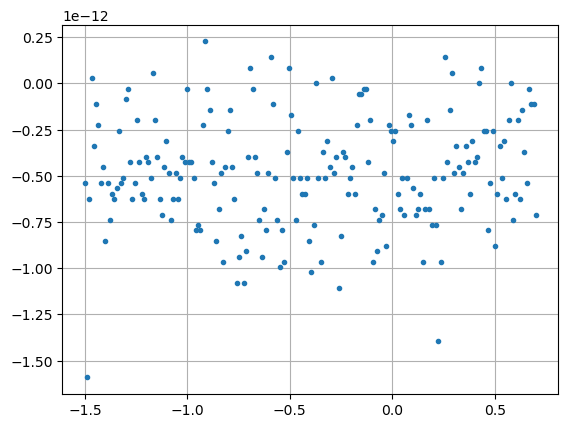

In [ ]:
X, Y, R, T, V = data['X'], data['Y'], data['R'], data['T'], data['V']

# ---Graficas de las mediciones---
plt.figure()
plt.subplots()
plt.plot(V,-X,'.')
plt.grid()



In [ ]:
#---Guardado de datos en un archivo csv---
data.to_csv('Mediciones/alt_ruido.csv', index=False)

# Barrido de longitud de onda

In [ ]:
X, Y, R, T, long = [], [], [], [], []

# Seteo el voltaje inicial
lockin.set_aux_out(1,1) 

# ---Medicion de barrido de longitudes de onda---
for i in np.linspace(0,310,311).astype('int'):
    # Guardo la longitud de onda
    long.append(730-i)

    # Señal ttl para cambiar la longitud de onda
    lockin.set_aux_out(3,5)
    lockin.set_aux_out(3,0) 
    time.sleep(0.5)

    # Toma las mediciones
    medicionXY = lockin.get_medicion()
    medicionRT = lockin.get_medicion(False)
    print(f'Longitud de onda:{730-i}')
    print(f'{medicionXY = }')
    print(f'{medicionRT = }')
    print('------------------')
    time.sleep(0.5)

    # Guarda las mediciones
    X.append(medicionXY[0])
    Y.append(medicionXY[1])
    R.append(medicionRT[0])
    T.append(medicionRT[1])

Longitud de onda:730
medicionXY = [-4.41107e-10, -5.00225e-12]
medicionRT = [3.20144e-10, -179.37]
------------------
Longitud de onda:729
medicionXY = [-2.30103e-10, -3.18325e-12]
medicionRT = [1.25056e-10, -179.244]
------------------
Longitud de onda:728
medicionXY = [-2.15096e-10, -2.7285e-12]
medicionRT = [1.11414e-10, -179.286]
------------------
Longitud de onda:727
medicionXY = [-2.15096e-10, -3.63801e-12]
medicionRT = [1.11414e-10, -179.022]
------------------
Longitud de onda:726
medicionXY = [-2.16006e-10, -3.63801e-12]
medicionRT = [1.12323e-10, -179.112]
------------------
Longitud de onda:725
medicionXY = [-2.16461e-10, -3.18325e-12]
medicionRT = [1.13233e-10, -179.208]
------------------
Longitud de onda:724
medicionXY = [-2.16915e-10, -4.5475e-12]
medicionRT = [1.13233e-10, -178.854]
------------------
Longitud de onda:723
medicionXY = [-2.18734e-10, -4.09275e-12]
medicionRT = [1.15506e-10, -178.95]
------------------
Longitud de onda:722
medicionXY = [-2.21008e-10, -4.

In [ ]:
# ---Guradado de mediciones en un DataFrame---
data = pd.DataFrame({'X':X,
                     'Y':Y,
                     'R':R,
                     'T':T,
                     'long':long})

display(data)

,X,Y,R,T,long
0,-4.411070e-10,-5.002250e-12,3.201440e-10,-179.370,730
1,-2.301030e-10,-3.183250e-12,1.250560e-10,-179.244,729
2,-2.150960e-10,-2.728500e-12,1.114140e-10,-179.286,728
3,-2.150960e-10,-3.638010e-12,1.114140e-10,-179.022,727
4,-2.160060e-10,-3.638010e-12,1.123230e-10,-179.112,726
...,...,...,...,...,...
306,-1.427910e-09,1.364250e-12,1.321500e-09,179.934,424
307,-1.362880e-09,3.638010e-12,1.256930e-09,179.844,423
308,-1.306500e-09,4.547500e-12,1.200540e-09,179.778,422
309,-1.238280e-09,5.002250e-12,1.131870e-09,179.754,421


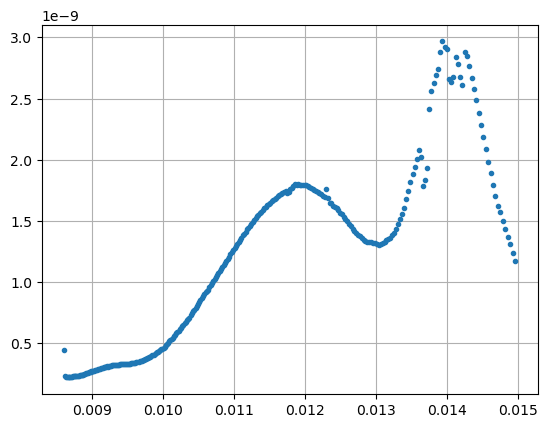

In [ ]:
# ---Graficas de las mediciones---
long = np.array(data['long'])
X = np.array(data['X'])
plt.figure()
plt.plot(2*np.pi/long,-X,'.')
plt.grid()

In [ ]:
# ---Guardado de datos en un archivo csv---
data.to_csv('Mediciones/Barrido de longitudes/medicion_completa_5v.csv', index=False)